***

### PCA Iris

***

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# working with iris dataset
iris = load_iris()
X = iris.data
y = iris.target
names = iris.target_names
col_names = iris.feature_names

#### Part a)

In [2]:
# standard deviations per feature
X_std = np.std(X, axis=0, ddof=1)
print('Standard deviations per feature:')
for i in range(len(X_std)):
    print(col_names[i] + ':', X_std[i])

Standard deviations per feature:
sepal length (cm): 0.8280661279778629
sepal width (cm): 0.435866284936698
petal length (cm): 1.7652982332594667
petal width (cm): 0.7622376689603465


#### Part b)

Standardizing the variables ensures comparison along a similar scale, because
some variables may be larger in mean and standard deviation than others without
actually representing variability of the data. If they are not standardized,
they could misleadingly dominate the principle components.

#### Part c)

In [3]:
# Try PCA without standardization
C = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(C)
print('Eigenvalues:\n', eig_vals)
print('Eigenvectors:\n', eig_vecs)

proportions = eig_vals / np.sum(eig_vals)
print('Proportions:\n', proportions)

cum_proportions = np.cumsum(proportions)
print('Cumulative proportions:\n', cum_proportions)

Eigenvalues:
 [4.22824171 0.24267075 0.0782095  0.02383509]
Eigenvectors:
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
Proportions:
 [0.92461872 0.05306648 0.01710261 0.00521218]
Cumulative proportions:
 [0.92461872 0.97768521 0.99478782 1.        ]


PC1 accounts for 92.5% of the variance, while PC2 accounts for 5.3% of the
variance. This tells us that the data is highly multicollinear, and most of
the information about the relationship between variables is captured by one
dimension. We can also see that the third variable dominates the rest since the first PC axis is very close to it.

#### Part d)

In [4]:
# Now try PCA with standardization
R = np.corrcoef(X.T)
eig_vals, V = np.linalg.eig(R)
print('Eigenvalues:\n', eig_vals)
print('Eigenvectors:\n', V)

proportions = eig_vals / np.sum(eig_vals)
print('Proportions:\n', proportions)

cum_proportions = np.cumsum(proportions)
print('Cumulative proportions:\n', cum_proportions)

Eigenvalues:
 [2.91849782 0.91403047 0.14675688 0.02071484]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Proportions:
 [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative proportions:
 [0.72962445 0.95813207 0.99482129 1.        ]


PC1 now accounts for 73.0% of the variance, while PC2 accounts for 22.9% of the
variance. Together they both account for about 96% of the variance in the
original data.

#### Part e)

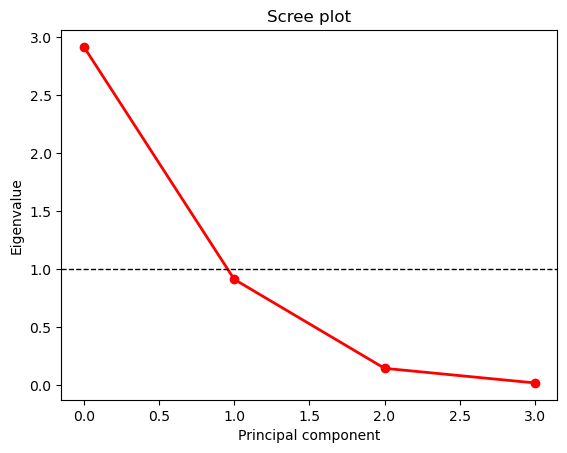

In [5]:
# generate a scree plot
plt.figure()
plt.plot(eig_vals, 'ro-', linewidth=2)
plt.axhline(y=1, linewidth=1, color='k', linestyle='--')
plt.title('Scree plot')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [6]:
# calculate PC scores
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)
V = eig_vecs
PC_scores = X_std @ V

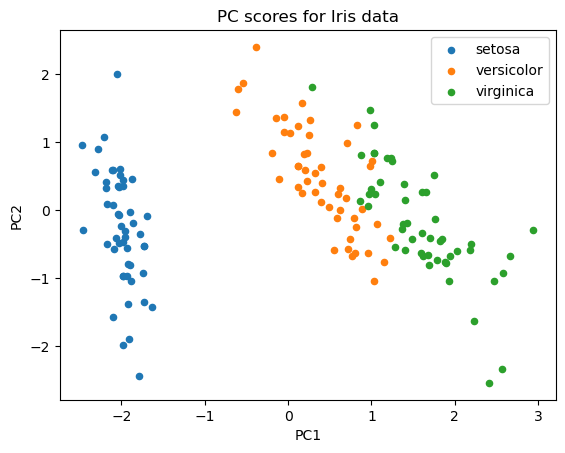

In [7]:
# plot the first two PC scores, colored by class
plt.figure()
for i in range(len(names)):
    plt.scatter(PC_scores[y == i, 0], PC_scores[y == i, 1], label=names[i], s=20)
plt.legend()
plt.title('PC scores for Iris data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

"Sesota" is the most distinct species.

#### Part f)

In [72]:
def ortho_rotation(lam, method='varimax',gamma=None,
                   eps=1e-8, itermax=1000):
    """
    Return orthogal rotation matrix
    """
    if gamma == None:
        if method == 'varimax':
            gamma = 1.0
        if method == 'quartimax':
            gamma = 0.0

    nrow, ncol = lam.shape
    R = np.eye(ncol)
    var = 0

    for i in range(itermax):
        lam_rot = lam @ R
        tmp = np.diag(np.sum(lam_rot ** 2, axis=0)) / nrow * gamma
        u, s, v = np.linalg.svd(lam.T @ (lam_rot ** 3 - (lam_rot @ tmp)))
        R = u @ v
        var_new = np.sum(s)
        if var_new < var * (1 + eps):
            break
        var = var_new

    return lam @ R

In [83]:
# rotate the eigenvectors
V_rot = ortho_rotation(V[:, :2])
V_rot_disp = V_rot.copy()
V_rot_disp[abs(V_rot_disp) < 0.3] = 0
print('Rotated loadings:\n', V_rot_disp)

########################################################
# this doesn't match R's output
# something about normalization because SS loadings != 1

Rotated loadings:
 [[ 0.         -0.71649536]
 [ 0.         -0.69757347]
 [ 0.87402381  0.        ]
 [ 0.36615279  0.        ]]


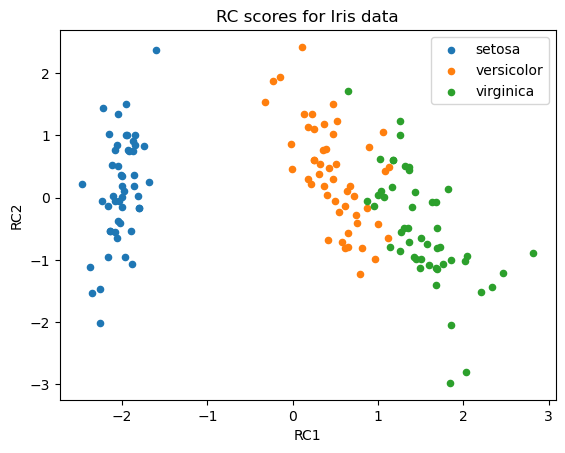

In [84]:
# plot the RC scores, colored by class
RC_scores = X_std @ V_rot
plt.figure()
for i in range(len(names)):
    plt.scatter(RC_scores[y == i, 0], RC_scores[y == i, 1], label=names[i], s=20)
plt.legend()
plt.title('RC scores for Iris data')
plt.xlabel('RC1')
plt.ylabel('RC2')
plt.show()

#### Justifying Rotated Components

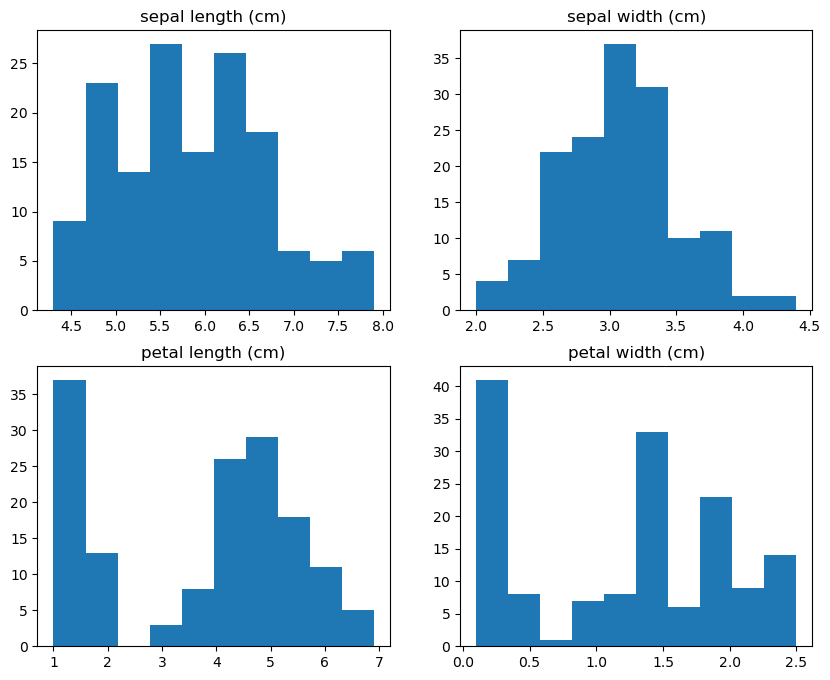

In [87]:
# Histograms of features 
plt.figure(1, figsize=(10, 8))
plt.subplot(221)
plt.hist(X[:,0], bins=10)
plt.title(col_names[0])
plt.subplot(222)
plt.hist(X[:,1], bins=10)
plt.title(col_names[1])
plt.subplot(223)
plt.hist(X[:,2], bins=10)
plt.title(col_names[2])
plt.subplot(224)
plt.hist(X[:,3], bins=10)
plt.title(col_names[3])
plt.show()

In [90]:
# mean + stdev of sepal width per species
print('Mean + stdev of sepal width per species:')
for i in range(len(names)):
    print(names[i] + ':', np.mean(X[y==i,1]), '+/-', np.std(X[y==i,1], ddof=1))

# Sesota has generally larger sepal widths

Mean + stdev of sepal width per species:
setosa: 3.428 +/- 0.3790643690962887
versicolor: 2.7700000000000005 +/- 0.3137983233784114
virginica: 2.974 +/- 0.32249663817263746
